# Machine Learning Models for stock prediction - non transformation version

# Import necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Import data

The data was downloaded from Bloomberg on:
* Exchange rate of Vietnam with its major trading partners: the China and the US
* Precious metal spot price and future price: Gold, Silver, Palladium, Platinum
* Global Stock Indices: Hang Seng Index, Nasdaq 100, Nasdaq Composite, Nikkei 225, SP500, DOJI, Shanghai Shenzhen CSI3000, Shanghai Shenzhen Composite and Singapore Stock Index
* Volatility stock index: VIX Index

The data will be imported from previous EDA session, which has been cleaned.

In [79]:
# Import data
data = pd.read_csv('data.csv', index_col = ['Date'])

# Feature Extraction

We will generate the following set of features:
- Return of n lag days
- Lags price of n lag days
- Diff price of n lag days

In [80]:
# Generate lag function

def generate_lag(df, n_lags):
    """
    Generate n lag for each columns of the dataframe
    
    """
     # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define n_lags:
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_lag_{i}"
            df2[new_col_name] = df2[col].shift(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [81]:
# Generate return
def generate_return(df, n_lags):
    """
    Generate n lag return for each columns of the dataframe
    
    """
    # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define lag range
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_return_{i}"
            df2[new_col_name] = df2[col].pct_change(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [82]:
# Generate diff
def generate_diff(df, n_lags):
    """
    Generate n lag diff for each columns of the dataframe
    
    """
     # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define n_lags:
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_diff_{i}"
            df2[new_col_name] = df2[col].diff(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [116]:
# Generate lag
data_lag = generate_lag(data, 5)
data_ret = generate_return(data, 5)
data_diff = generate_diff(data, 5)

In [117]:
# Merge all of dataframes into one big data
data_features = pd.concat([data, data_lag, data_ret, data_diff], axis = 1)
data_features.head()

,index_sp500,spot_palladium,index_shsz_csi300,index_vni,index_sp500_lag_1,index_sp500_lag_2,index_sp500_lag_3,index_sp500_lag_4,index_sp500_lag_5,spot_palladium_lag_1,...,index_shsz_csi300_diff_1,index_shsz_csi300_diff_2,index_shsz_csi300_diff_3,index_shsz_csi300_diff_4,index_shsz_csi300_diff_5,index_vni_diff_1,index_vni_diff_2,index_vni_diff_3,index_vni_diff_4,index_vni_diff_5
Date,,,,,,,,,,,,,,,,,,,,,
7/2/2007,1519.43,368.5,16130,994.17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/3/2007,1524.87,365.0,16131,977.30,1519.43,NaN,NaN,NaN,NaN,368.5,...,1.0,NaN,NaN,NaN,NaN,-16.87,NaN,NaN,NaN,NaN
7/4/2007,1522.19,366.0,16130,1013.56,1524.87,1519.43,NaN,NaN,NaN,365.0,...,-1.0,0.0,NaN,NaN,NaN,36.26,19.39,NaN,NaN,NaN
7/5/2007,1525.40,365.5,16130,1012.82,1522.19,1524.87,1519.43,NaN,NaN,366.0,...,0.0,-1.0,0.0,NaN,NaN,-0.74,35.52,18.65,NaN,NaN
7/6/2007,1530.44,367.0,16135,1010.53,1525.40,1522.19,1524.87,1519.43,NaN,365.5,...,5.0,5.0,4.0,5.0,NaN,-2.29,-3.03,33.23,16.36,NaN


In [118]:
# Drop missing values
data_features = data_features.iloc[10:]

In [119]:
data_features.head()

,index_sp500,spot_palladium,index_shsz_csi300,index_vni,index_sp500_lag_1,index_sp500_lag_2,index_sp500_lag_3,index_sp500_lag_4,index_sp500_lag_5,spot_palladium_lag_1,...,index_shsz_csi300_diff_1,index_shsz_csi300_diff_2,index_shsz_csi300_diff_3,index_shsz_csi300_diff_4,index_shsz_csi300_diff_5,index_vni_diff_1,index_vni_diff_2,index_vni_diff_3,index_vni_diff_4,index_vni_diff_5
Date,,,,,,,,,,,,,,,,,,,,,
7/16/2007,1549.52,367.50,16130,995.83,1552.50,1547.70,1518.76,1510.12,1531.85,368.13,...,0.0,0.0,-2.0,-3.0,-4.0,-19.90,-21.85,-34.02,-27.21,-14.44
7/17/2007,1549.37,364.50,16130,1000.33,1549.52,1552.50,1547.70,1518.76,1510.12,367.50,...,0.0,0.0,0.0,-2.0,-3.0,4.50,-15.40,-17.35,-29.52,-22.71
7/18/2007,1546.17,368.75,16135,994.73,1549.37,1549.52,1552.50,1547.70,1518.76,364.50,...,5.0,5.0,5.0,5.0,3.0,-5.60,-1.10,-21.00,-22.95,-35.12
7/19/2007,1553.08,371.13,16140,984.43,1546.17,1549.37,1549.52,1552.50,1547.70,368.75,...,5.0,10.0,10.0,10.0,10.0,-10.30,-15.90,-11.40,-31.30,-33.25
7/20/2007,1534.10,372.00,16137,981.31,1553.08,1546.17,1549.37,1549.52,1552.50,371.13,...,-3.0,2.0,7.0,7.0,7.0,-3.12,-13.42,-19.02,-14.52,-34.42


# Machine Learning models - Regression

We will perform the test on several models to determine which models will perform best. The models are:
- Linear Regression (include Ridge and Lasso for avoid multicolinearity)
- Decision Trees Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

## Train test split - 70% 20% 10%

In [120]:
# Define train test split
def train_test_split(df, target):
    # Define train, cv, test time
    train_time = int(round(len(df) * 0.7))
    cv_time = int(round(len(df) * 0.1))
    
    # Define X, y
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train test split
    X_train = X.iloc[:train_time]
    X_cv = X.iloc[train_time : (train_time + cv_time)]
    X_test = X.iloc[(train_time + cv_time):]
    
    y_train = y.iloc[:train_time]
    y_cv = y.iloc[train_time : (train_time + cv_time)]
    y_test = y.iloc[(train_time + cv_time):]
    
    # Print out to check shape
    print(X_train.shape)
    print(X_cv.shape)
    print(X_test.shape)
    
    print(y_train.shape)
    print(y_cv.shape)
    print(y_test.shape)
    
    return X_train, y_train, X_cv, y_cv, X_test, y_test

In [136]:
# Train test split the dataset
X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(data, 'index_vni')

(2922, 3)
(418, 3)
(835, 3)
(2922,)
(418,)
(835,)


In [137]:
# Import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

## Prepare models

We will prepare regression models. We will fit on non-tuned models first to see the model, then based on the result, we will perform further hyperparameters tunning if needed

In [138]:
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [139]:
# Call out object
lr = LinearRegression()
ridge = Ridge(alpha = 15)
lasso = Lasso(alpha = 20)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)

# Set models list
models = [lr, ridge, lasso, dtr, gb, xgb, rf]

## Test models

In [140]:
# Import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(mse):
    rmse = np.sqrt(mse)

In [146]:
# Define evaluate model
def evaluate_model(model, X_train, y_train, X_cv, y_cv):
    # Fit model and obtain result
    model.fit(X_train, y_train)
    y_pred_cv = model.predict(X_cv)
    MAE = mae(y_cv, y_pred_cv)
    MSE = mse(y_cv, y_pred_cv)
    RMSE = rmse(MSE)

    # Store result
    return MAE, MSE, RMSE

In [157]:
# Test the model

col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)
    MAE_cv.append(MAE)
    MSE_cv.append(MSE)

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
XGBoost,37.631431,3724.407643
Gradient Boosting,40.155460,3515.126881
Random Forest,42.335114,3452.050284
Decision Tree,47.614654,4008.385792
Lasso,87.663947,9232.927680
Ridge,99.689838,19937.125148
Linear Regression,102.658798,21204.551532


XGBoost Regressor has the lowest error, and shows potentials to tunning for more. Furthermore, we just simply fit scaled data without any feature extraction.

## Test with feature extraction data

In [160]:
# Train test split data
X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(data_features, 'index_vni')

(2916, 63)
(416, 63)
(833, 63)
(2916,)
(416,)
(833,)


In [161]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_cv_scaled = scaler_minmax.transform(X_cv)
X_test_scaled = scaler_minmax.transform(X_test)

In [163]:
# Test with models
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Gradient Boosting,3.501,21.844
Random Forest,4.798,63.579
XGBoost,6.803,84.037
Decision Tree,7.944,154.351
Ridge,9.359,172.332
Lasso,188.788,36979.376


We will test again without scaling but the absolute values of the input features 

In [164]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train, y_train, X_cv, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,0.000,0.000
Lasso,1.259,3.631
Gradient Boosting,3.595,22.206
Random Forest,4.351,57.677
XGBoost,6.803,84.037
Decision Tree,7.652,143.913


Non-scaling input gives us better result for stock prediction. All models give very good result, only XGBoost and Decision Tree Regressor give a quite high error. Linear Regression and Ridge seems to perform the best, however, this could be a sign of overfitting, and cross-validation dataset only contains 10% of the total data points. We will predict the model on test dataset

In [165]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train, y_train, X_test, y_test)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,0.000,0.000
Lasso,2.167,10.306
Gradient Boosting,80.332,17651.034
XGBoost,90.395,20506.552
Random Forest,92.525,22103.933
Decision Tree,107.010,26232.312


Linear and Ridge regression still performed very well even without scaling. Now we will test on scaled data

In [166]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,32.411,1133.312
Gradient Boosting,79.646,17397.490
XGBoost,90.395,20506.552
Random Forest,95.213,23080.884
Decision Tree,103.098,24771.147
Lasso,304.439,103946.772


With the scaled data, the Linear Regression still gives excellent result, with almost no different from actual price. But there is a thing should be notice here is that the Ridge model, which is basically Linear model with added penalty to avoid overfitting, gives extremely high result.

In [172]:
# Get visualization
def get_pred(model, X_train, y_train, X_cv, y_cv, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Obtain prediction
    y_pred_train = model.predict(X_train)
    y_pred_cv = model.predict(X_cv)
    y_pred_test = model.predict(X_test)
    
    y_pred_model = np.concatenate([y_pred_train, y_pred_cv, y_pred_test], axis = None)
    
    return y_pred_model

In [173]:
# Obtain prediction of 3 linear models
y_pred_lr = get_pred(lr, X_train, y_train, X_cv, y_cv, X_test, y_test)
y_pred_ridge = get_pred(ridge, X_train, y_train, X_cv, y_cv, X_test, y_test)
y_pred_lasso = get_pred(lasso, X_train, y_train, X_cv, y_cv, X_test, y_test)

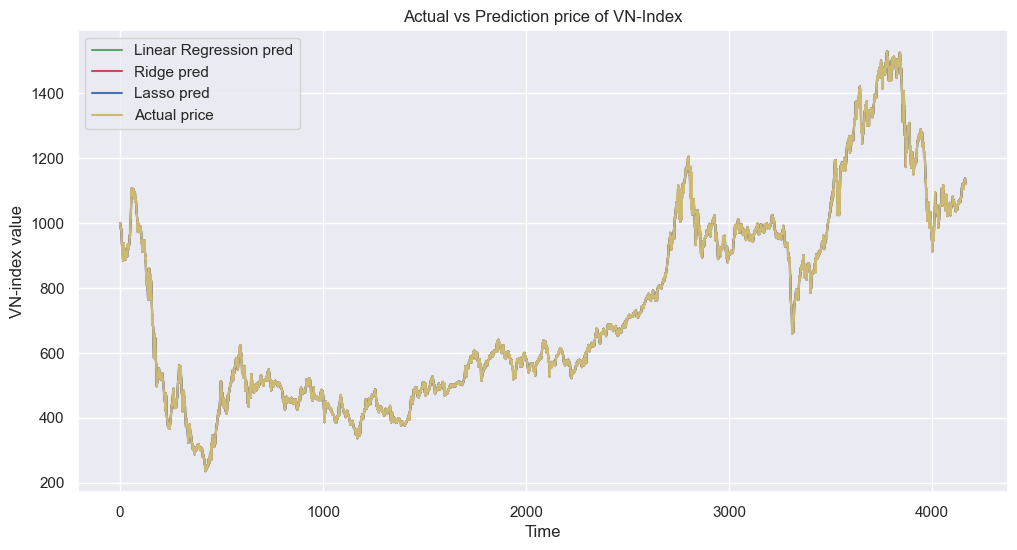

In [180]:
# Visualize prediction
y = np.concatenate([y_train, y_cv, y_test], axis = None)

fig, ax = plt.subplots(figsize = (12,6))

ax.plot(y_pred_lr, color = 'g', label = 'Linear Regression pred')
ax.plot(y_pred_ridge, color = 'r', label = 'Ridge pred')
ax.plot(y_pred_lasso, color = 'b', label = 'Lasso pred')
ax.plot(y, color = 'y', label = 'Actual price')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('VN-index value')
ax.set_title('Actual vs Prediction price of VN-Index')
plt.show()

The linear models (including Lasso and Ridge) runs perfectly well. This could indicates that we might gone somewhere wrong. In reality, if we can have a model like this we would have been super rich already. The problem might be from from the diff and return generation.

We generate return and price different on the test and cv data, so basically what we have done is to bring future values back to the past, and use the data to again, predict the future. That's why linear models have a outstanding predictions, but in reality it won't happen like that.

This notebook is purely for experiement and testing. Please be aware of this problem for your next feature extraction.